In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
from matplotlib_inline.backend_inline import set_matplotlib_formats

# Set the desired output format
set_matplotlib_formats('svg')

from tol_colors import tol_cmap, tol_cset
cmap = tol_cset('bright')
from tqdm.notebook import tqdm
import numpy as np
from copy import deepcopy
from online_cp.martingale import SimpleJumper, PluginMartingale

In [ ]:
usps_orig = np.load('../data/data_martingale_experiment/p_values_usps_orig.npy')
usps_shuffle = np.load('../data/data_martingale_experiment/p_values_usps_shuffle.npy')

satlog_orig = np.load('../data/data_martingale_experiment/p_values_satelite_orig.npy')
satlog_shuffle = np.load('../data/data_martingale_experiment/p_values_satelite_shuffle.npy')

In [ ]:
from tqdm.notebook import tqdm

def run_martingale(martingale, p_values, progress=True, name=''):
    iterable = tqdm(p_values, desc=name) if progress else p_values
    for p in iterable:
        martingale.update_martingale_value(p)
    return deepcopy(martingale)

In [ ]:
min_sample_size = 100
min_sample_size_plugin = min_sample_size
min_sample_size_parametric = min_sample_size
J = 0.01

In [ ]:
Martingales = {
    'Simple Jumper': SimpleJumper(J=J, warnings=False),
    'Plugin Gaussian kernel': PluginMartingale(warnings=False, min_sample_size=min_sample_size_plugin),
    'Plugin Beta Moments': PluginMartingale(method='beta', beta_method='moment', warnings=False, min_sample_size=min_sample_size_parametric),
    'Plugin Beta MLE': PluginMartingale(method='beta', beta_method='mle', warnings=False, min_sample_size=min_sample_size_parametric),
}

fig11, ax = plt.subplots()
p_values = usps_orig
for i, (name, M) in enumerate(Martingales.items()):
    ax.plot(run_martingale(martingale=M, p_values=p_values, name=name).log10_martingale_values, label=name, color=cmap[i])
ax.set_ylabel(r'$\log_{10}M$')
ax.set_xlabel(r'$n$')
ax.legend()
fig11.tight_layout()

In [ ]:
fig12, ax = plt.subplots()
prange = np.linspace(0, 1, endpoint=True, num=1000)
for i, (name, M) in enumerate(Martingales.items()):
    ax.plot(prange, M.b_n(prange), label=name, color=cmap[i])
ax.hist(p_values, density=True, label='histogram', color=cmap[i+1])
ax.set_ylabel(r'$b_n$')
ax.set_xlabel(r'$p$')
fig12.suptitle('Final betting functions')
ax.legend()
fig12.tight_layout()

In [ ]:
Martingales = {
    'Simple Jumper': SimpleJumper(J=J, warnings=False),
    'Plugin Gaussian kernel': PluginMartingale(warnings=False, min_sample_size=min_sample_size_plugin),
    'Plugin Beta Moments': PluginMartingale(method='beta', beta_method='moment', warnings=False, min_sample_size=min_sample_size_parametric),
    'Plugin Beta MLE': PluginMartingale(method='beta', beta_method='mle', warnings=False, min_sample_size=min_sample_size_parametric),
}

fig21, ax = plt.subplots()
p_values = usps_shuffle
for i, (name, M) in enumerate(Martingales.items()):
    ax.plot(run_martingale(martingale=M, p_values=p_values).log10_martingale_values, label=name, color=cmap[i])
ax.set_ylabel(r'$\log_{10}M$')
ax.set_xlabel(r'$n$')
ax.legend()
fig21.tight_layout()

In [ ]:
fig22, ax = plt.subplots()
prange = np.linspace(0, 1, endpoint=True, num=1000)
for i, (name, M) in enumerate(Martingales.items()):
    ax.plot(prange, M.b_n(prange), label=name, color=cmap[i])
ax.hist(p_values, density=True, label='histogram', color=cmap[i+1])
ax.set_ylabel(r'$b_n$')
ax.set_xlabel(r'$p$')
fig22.suptitle('Final betting functions')
ax.legend()
fig22.tight_layout()

In [ ]:
Martingales = {
    'Simple Jumper': SimpleJumper(J=J, warnings=False),
    'Plugin Gaussian kernel': PluginMartingale(warnings=False, min_sample_size=min_sample_size_plugin),
    'Plugin Beta Moments': PluginMartingale(method='beta', beta_method='moment', warnings=False, min_sample_size=min_sample_size_parametric),
    'Plugin Beta MLE': PluginMartingale(method='beta', beta_method='mle', warnings=False, min_sample_size=min_sample_size_parametric),
}

fig31, ax = plt.subplots()
p_values = satlog_orig
for i, (name, M) in enumerate(Martingales.items()):
    ax.plot(run_martingale(martingale=M, p_values=p_values).log10_martingale_values, label=name, color=cmap[i])
ax.set_ylabel(r'$\log_{10}M$')
ax.set_xlabel(r'$n$')
ax.legend()
fig31.tight_layout()

In [ ]:
fig32, ax = plt.subplots()
prange = np.linspace(0, 1, endpoint=True, num=1000)
for i, (name, M) in enumerate(Martingales.items()):
    ax.plot(prange, M.b_n(prange), label=name, color=cmap[i])
ax.hist(p_values, density=True, label='histogram', color=cmap[i+1])
ax.set_ylabel(r'$b_n$')
ax.set_xlabel(r'$p$')
fig32.suptitle('Final betting functions')
ax.legend()
fig32.tight_layout()

In [ ]:
Martingales = {
    'Simple Jumper': SimpleJumper(J=J, warnings=False),
    'Plugin Gaussian kernel': PluginMartingale(warnings=False, min_sample_size=min_sample_size_plugin),
    'Plugin Beta Moments': PluginMartingale(method='beta', beta_method='moment', warnings=False, min_sample_size=min_sample_size_parametric),
    'Plugin Beta MLE': PluginMartingale(method='beta', beta_method='mle', warnings=False, min_sample_size=min_sample_size_parametric),
}

fig41, ax = plt.subplots()
p_values = satlog_shuffle
for i, (name, M) in enumerate(Martingales.items()):
    ax.plot(run_martingale(martingale=M, p_values=p_values).log10_martingale_values, label=name, color=cmap[i])
ax.set_ylabel(r'$\log_{10}M$')
ax.set_xlabel(r'$n$')
ax.legend()
fig41.tight_layout()

In [ ]:
fig42, ax = plt.subplots()
prange = np.linspace(0, 1, endpoint=True, num=1000)
for i, (name, M) in enumerate(Martingales.items()):
    ax.plot(prange, M.b_n(prange), label=name, color=cmap[i])
ax.hist(p_values, density=True, label='histogram', color=cmap[i+1])
ax.set_ylabel(r'$b_n$')
ax.set_xlabel(r'$p$')
fig42.suptitle('Final betting functions')
ax.legend()
fig42.tight_layout()

# Idea
If the betting function does not deviate significantly from uniformity, we may not want to bet. One idea is to set a limit on the KL divergence.

### Try change point detection with the different martingales. 

In [118]:
rnd_gen = np.random.default_rng(2025)
synth_uniform = rnd_gen.uniform(0, 1, size=5000)
synth_non_uniform = rnd_gen.beta(0.95, 1.05, size=5000)
synth_p_values = np.append(synth_uniform, synth_non_uniform)

Simple Jumper:   0%|          | 0/10000 [00:00<?, ?it/s]

Plugin Gaussian kernel:   0%|          | 0/10000 [00:00<?, ?it/s]

Plugin Beta Moments:   0%|          | 0/10000 [00:00<?, ?it/s]

Plugin Beta MLE:   0%|          | 0/10000 [00:00<?, ?it/s]

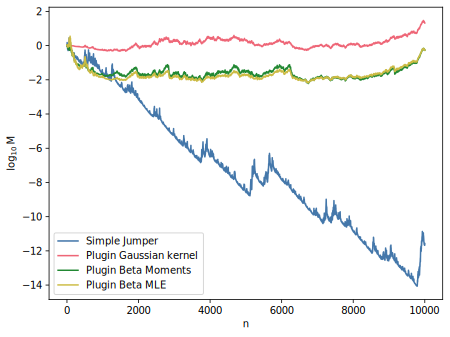

In [119]:
Martingales = {
    'Simple Jumper': SimpleJumper(J=J, warnings=False),
    'Plugin Gaussian kernel': PluginMartingale(warnings=False, min_sample_size=min_sample_size_plugin),
    'Plugin Beta Moments': PluginMartingale(method='beta', beta_method='moment', warnings=False, min_sample_size=min_sample_size_parametric),
    'Plugin Beta MLE': PluginMartingale(method='beta', beta_method='mle', warnings=False, min_sample_size=min_sample_size_parametric),
}

fig, ax = plt.subplots()
p_values = synth_p_values
for i, (name, M) in enumerate(Martingales.items()):
    ax.plot(run_martingale(martingale=M, p_values=p_values, name=name).log10_martingale_values, label=name, color=cmap[i])
ax.set_ylabel(r'$\log_{10}M$')
ax.set_xlabel(r'$n$')
ax.legend()
fig.tight_layout()

(array([1.04331329, 1.01730548, 1.03331029, 1.02230698, 1.04331329,
        1.00230097, 0.98529587, 0.96729046, 0.96428956, 0.92427754]),
 array([1.41462854e-04, 1.00111435e-01, 2.00081406e-01, 3.00051378e-01,
        4.00021350e-01, 4.99991322e-01, 5.99961293e-01, 6.99931265e-01,
        7.99901237e-01, 8.99871209e-01, 9.99841180e-01]),
 <BarContainer object of 10 artists>)

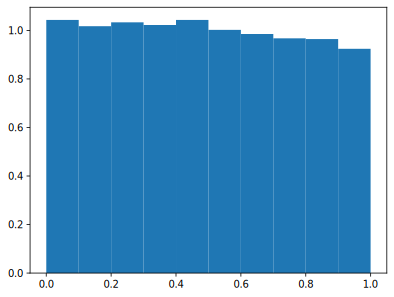

In [120]:
plt.hist(synth_p_values, density=True)

Plugin Gaussian:   0%|          | 0/5000 [00:00<?, ?it/s]

Plugin Gaussian Window 100:   0%|          | 0/5000 [00:00<?, ?it/s]

Plugin Gaussian Window 250:   0%|          | 0/5000 [00:00<?, ?it/s]

Plugin Gaussian Window 500:   0%|          | 0/5000 [00:00<?, ?it/s]

Plugin Gaussian Window 1000:   0%|          | 0/5000 [00:00<?, ?it/s]

Plugin Gaussian Window 1500:   0%|          | 0/5000 [00:00<?, ?it/s]

Plugin Gaussian Window 2000:   0%|          | 0/5000 [00:00<?, ?it/s]

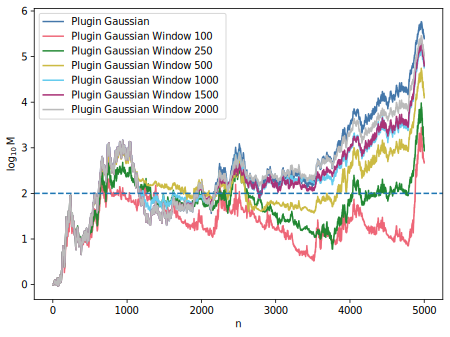

In [129]:
min_sample_size_plugin = 100
Martingales = {
    'Plugin Gaussian': PluginMartingale(warnings=False, min_sample_size=min_sample_size_plugin, window_size=None),
    'Plugin Gaussian Window 100': PluginMartingale(warnings=False, min_sample_size=min_sample_size_plugin, window_size=100),
    'Plugin Gaussian Window 250': PluginMartingale(warnings=False, min_sample_size=min_sample_size_plugin, window_size=250),
    'Plugin Gaussian Window 500': PluginMartingale(warnings=False, min_sample_size=min_sample_size_plugin, window_size=500),
    'Plugin Gaussian Window 1000': PluginMartingale(warnings=False, min_sample_size=min_sample_size_plugin, window_size=1000),
    'Plugin Gaussian Window 1500': PluginMartingale(warnings=False, min_sample_size=min_sample_size_plugin, window_size=1500),
    'Plugin Gaussian Window 2000': PluginMartingale(warnings=False, min_sample_size=min_sample_size_plugin, window_size=2000),
}

fig, ax = plt.subplots()
p_values = synth_non_uniform
for i, (name, M) in enumerate(Martingales.items()):
    ax.plot(run_martingale(martingale=M, p_values=p_values, name=name).log10_martingale_values, label=name, color=cmap[i])
ax.axhline(y=2, linestyle='--')
ax.set_ylabel(r'$\log_{10}M$')
ax.set_xlabel(r'$n$')
ax.legend()
fig.tight_layout()

Plugin Gaussian:   0%|          | 0/10000 [00:00<?, ?it/s]

Plugin Gaussian Window 100:   0%|          | 0/10000 [00:00<?, ?it/s]

Plugin Gaussian Window 250:   0%|          | 0/10000 [00:00<?, ?it/s]

Plugin Gaussian Window 500:   0%|          | 0/10000 [00:00<?, ?it/s]

Plugin Gaussian Window 1000:   0%|          | 0/10000 [00:00<?, ?it/s]

Plugin Gaussian Window 1500:   0%|          | 0/10000 [00:00<?, ?it/s]

Plugin Gaussian Window 2000:   0%|          | 0/10000 [00:00<?, ?it/s]

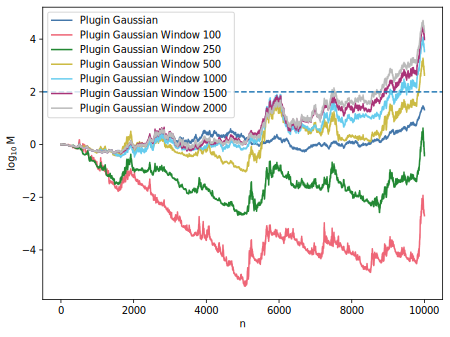

In [125]:
min_sample_size_plugin = 1000
Martingales = {
    'Plugin Gaussian': PluginMartingale(warnings=False, min_sample_size=min_sample_size_plugin, window_size=None),
    'Plugin Gaussian Window 100': PluginMartingale(warnings=False, min_sample_size=min_sample_size_plugin, window_size=100),
    'Plugin Gaussian Window 250': PluginMartingale(warnings=False, min_sample_size=min_sample_size_plugin, window_size=250),
    'Plugin Gaussian Window 500': PluginMartingale(warnings=False, min_sample_size=min_sample_size_plugin, window_size=500),
    'Plugin Gaussian Window 1000': PluginMartingale(warnings=False, min_sample_size=min_sample_size_plugin, window_size=1000),
    'Plugin Gaussian Window 1500': PluginMartingale(warnings=False, min_sample_size=min_sample_size_plugin, window_size=1500),
    'Plugin Gaussian Window 2000': PluginMartingale(warnings=False, min_sample_size=min_sample_size_plugin, window_size=2000),
}

fig, ax = plt.subplots()
p_values = synth_p_values
for i, (name, M) in enumerate(Martingales.items()):
    ax.plot(run_martingale(martingale=M, p_values=p_values, name=name).log10_martingale_values, label=name, color=cmap[i])
ax.axhline(y=2, linestyle='--')
ax.set_ylabel(r'$\log_{10}M$')
ax.set_xlabel(r'$n$')
ax.legend()
fig.tight_layout()

Plugin Gaussian:   0%|          | 0/10000 [00:00<?, ?it/s]

Plugin Gaussian Window 100:   0%|          | 0/10000 [00:00<?, ?it/s]

Plugin Gaussian Window 250:   0%|          | 0/10000 [00:00<?, ?it/s]

Plugin Gaussian Window 500:   0%|          | 0/10000 [00:00<?, ?it/s]

Plugin Gaussian Window 1000:   0%|          | 0/10000 [00:00<?, ?it/s]

Plugin Gaussian Window 1500:   0%|          | 0/10000 [00:00<?, ?it/s]

Plugin Gaussian Window 2000:   0%|          | 0/10000 [00:00<?, ?it/s]

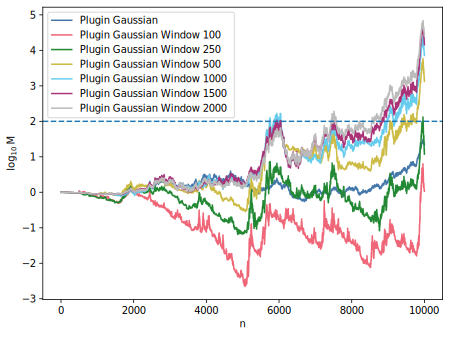

In [126]:
min_sample_size_plugin = 5000
Martingales = {
    'Plugin Gaussian': PluginMartingale(warnings=False, min_sample_size=min_sample_size_plugin, window_size=None),
    'Plugin Gaussian Window 100': PluginMartingale(warnings=False, min_sample_size=min_sample_size_plugin, window_size=100),
    'Plugin Gaussian Window 250': PluginMartingale(warnings=False, min_sample_size=min_sample_size_plugin, window_size=250),
    'Plugin Gaussian Window 500': PluginMartingale(warnings=False, min_sample_size=min_sample_size_plugin, window_size=500),
    'Plugin Gaussian Window 1000': PluginMartingale(warnings=False, min_sample_size=min_sample_size_plugin, window_size=1000),
    'Plugin Gaussian Window 1500': PluginMartingale(warnings=False, min_sample_size=min_sample_size_plugin, window_size=1500),
    'Plugin Gaussian Window 2000': PluginMartingale(warnings=False, min_sample_size=min_sample_size_plugin, window_size=2000),
}

fig, ax = plt.subplots()
p_values = synth_p_values
for i, (name, M) in enumerate(Martingales.items()):
    ax.plot(run_martingale(martingale=M, p_values=p_values, name=name).log10_martingale_values, label=name, color=cmap[i])
ax.axhline(y=2, linestyle='--')
ax.set_ylabel(r'$\log_{10}M$')
ax.set_xlabel(r'$n$')
ax.legend()
fig.tight_layout()

(array([1.14834483, 1.10033041, 1.0743226 , 0.99429857, 1.00630218,
        0.97829376, 0.99029737, 0.92627815, 0.93628115, 0.84825472]),
 array([1.41462854e-04, 1.00111435e-01, 2.00081406e-01, 3.00051378e-01,
        4.00021350e-01, 4.99991322e-01, 5.99961293e-01, 6.99931265e-01,
        7.99901237e-01, 8.99871209e-01, 9.99841180e-01]),
 <BarContainer object of 10 artists>)

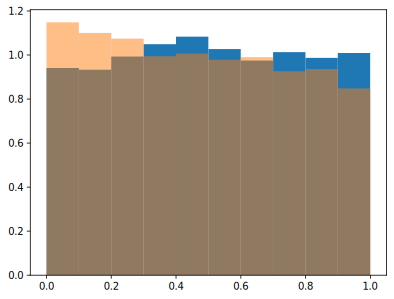

In [128]:
plt.hist(synth_uniform, density=True)
plt.hist(synth_non_uniform, density=True, alpha=0.5)